In [5]:
%matplotlib inline

import os
import numpy as np
from matplotlib import pyplot as plt

powers = []

In [13]:
def getpower(vapp,vcap,title):
    
    windowSize = 1
    Liss = create_lissajous(Vapp=vapp,Vcap=vcap,window=windowSize)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter([p[0] for p in Liss], [p[1] for p in Liss])
    area = find_area(Liss[0:1000])
    plt.title('The area of the Lissajous figure is: ' + str(area))
    ax.set_xlabel('volts, applied')
    ax.set_ylabel('volts, capacitor')
    #plt.savefig(title + '_pwr' + str(area).split('.')[0] + '.png',
    #  dpi=150) # save figure as .png
    plt.close(fig)
    
    volts = int(title)
    watts = int(str(area).split('.')[0])*470/1000
    powers.append((volts,watts))

In [7]:
from numpy import convolve, ones

def moving_average(interval, window_size):
    """Finds the moving average of a dataset over a window size."""
    # algorithm via http://stackoverflow.com/questions/11352047/finding-moving-average-from-data-points-in-python
    window = ones(int(window_size))/float(window_size)
    return convolve(interval, window, 'same')

def data_import(fileName,fileSeparator,firstRow=1,xCol=1,yCol=2):
    """Imports data from .csv and puts it into an array."""
    dataFile = open(fileName, 'r')
    for i in range(0,firstRow):
        line = dataFile.readline()
    line = dataFile.readline()
    dataReturn = []
    while(line != ''): 
	lineSplit = line.split(fileSeparator)
        dataLine = tuple(float(item.strip()) for item in [lineSplit[int(xCol)-1],lineSplit[int(yCol)-1]])
        dataReturn.append(dataLine)
        line = dataFile.readline()
    return dataReturn
    
def data_pasted(dataString,fileSeparator,firstRow=1,xCol=1,yCol=2):
    """Prepares data that has been copied and pasted into the worksheet from a CSV file."""
    dataList = dataString.splitlines()
    dataReturn = []
    for line in dataList:
	lineSplit = line.split(fileSeparator)
        dataLine = tuple(float(item.strip()) for item in [lineSplit[int(xCol)-1],lineSplit[int(yCol)-1]])
        if len(dataLine)!=0: dataReturn.append(dataLine)
    return dataReturn

def find_area(array):
    """Find the array of a polygon defined as a set of Cartesian points in an array."""
    # algorithm via http://www.arachnoid.com/area_irregular_polygon/index.html
    a = 0
    ox,oy = array[0]
    for x,y in array[1:]:
        a += (x*oy-y*ox)
        ox,oy = x,y
    return abs(a/2)

def create_lissajous(Vapp,Vcap,window=1):
    """Generates a Lissajous figure from the applied and capacitor voltage oscilloscope traces."""
    #x=[Vapp[i][1] for i in range(0,len(Vapp))] # if your data also includes time
    #y=[Vcap[i][1] for i in range(0,len(Vcap))]
    x = Vapp
    y = Vcap
    if window!= 1:
        x = moving_average(x,window)
        y = moving_average(y,window)
    Liss = []
    for i in range(0,len(Vapp)):
        Liss.append((x[i],y[i]))
    return Liss


In [ ]:
files = [item for item in sorted(os.listdir('data')) if '.png' not in item]
#print(files)

for file in files:
    try:
        filename = 'data/' + file
        dataset = np.genfromtxt(filename,delimiter=',')
        #fig = plt.figure()
        #ax1 = fig.add_subplot(111)

        # http://matplotlib.org/examples/color/named_colors.html
        colors = ['yellow','cyan','pink','darkblue']
        labels = ['V','Vcap','I']

        xax = [line[0] for line in dataset]
        data_v = [line[1] for line in dataset]
        data_vcap = [line[2] for line in dataset]
        data_i = [line[3] for line in dataset]
        voltage = max(data_v)-min(data_v)

        #ax1.plot(xax,data_v,linestyle='None',marker='o',markeredgecolor='cyan',markersize=1,
        #  label='voltage')
        #ax2 = ax1.twinx()
        #ax2.plot(xax,data_i,linestyle='None',marker='o',markeredgecolor='yellow',markersize=1,
        #  label='current')

        #ax1.legend(loc=1)
        #ax2.legend(loc=2)
        #ax1.grid()
        ##ax1.ylim(0,256)
        ##ax2.ylim(0,256)
        #ax1.set_xlabel("time, s")
        #ax1.set_ylabel("potential, V")
        #ax2.set_ylabel("current, A")
        #plt.title("oscilloscope traces, Vpp=" + str(voltage) + ", " + str(file))
        #filename = 'data/vpp' + str(voltage).split('.')[0]
        #fig.savefig(filename+'.png',dpi=150) # save the figure as a .png
        #plt.close(fig)

        #getpower(vapp=data_v,vcap=data_vcap,title=filename)
        getpower(vapp=data_v,vcap=data_vcap,title=str(voltage).split('.')[0])
    except:
        print("ERROR: " + filename)

np.savetxt('power.csv',powers,delimiter=',')

In [ ]:
### TESTING PLOTTING OF PARTICULAR DATASETS

%matplotlib inline

for file in files[50:52]:
    filename = 'data/' + file
    dataset = np.genfromtxt(filename,delimiter=',')
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    
    # http://matplotlib.org/examples/color/named_colors.html
    colors = ['yellow','cyan','pink','darkblue']
    labels = ['V','Vcap','I']
    
    xax = [line[0] for line in dataset]
    data_v = [line[1] for line in dataset]
    data_vcap = [line[2] for line in dataset]
    data_i = [line[3] for line in dataset]
    voltage = max(data_v)-min(data_v)
    
    ax1.plot(data_v[:],data_vcap[:],linestyle='-',marker='o',markeredgecolor='cyan',markersize=1,
      label='voltage')
    #ax2 = ax1.twinx()
    #ax2.plot(xax,data_vcap,linestyle='None',marker='o',markeredgecolor='yellow',markersize=1,
    #  label='current')
    fig.show()

In [ ]:
### TESTING PYTHONIC LIST ELEMENT FILTERING

a = [1,2,3,4,5,12,5,67,21]
b = [2]
[item for item in a if item not in b]

In [ ]:
### TESTING PYTHONIC LIST ELEMENT FILTERING

a = ['1','2','3','4','5','12','5','67','21']
[item for item in a if '2' in item]

In [ ]:

### TESTING PYTHONIC LIST ELEMENT FILTERING
files = [item for item in sorted(os.listdir('data')) if '.png' not in item]
print(files)

/usr/lib/pymodules/python2.7/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


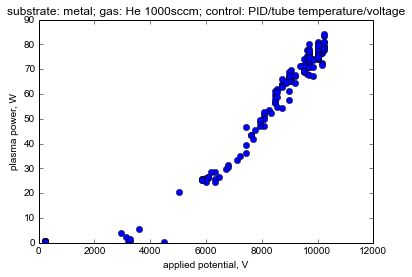

In [12]:
data = np.genfromtxt('power.csv',delimiter=',')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([item[0] for item in data],[item[1] for item in data],
       linestyle='None',marker='o')
ax.set_xlabel('applied potential, V')
ax.set_ylabel('plasma power, W')
ax.set_title('substrate: metal; gas: He 1000sccm; control: PID/tube temperature/voltage')
fig.show()